In [1]:
import numpy as np
import torch

In [2]:
import torch.nn as nn

In [3]:
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.fira, hep.style.firamath])
import time
import gc

In [4]:
import matplotlib

In [5]:
import sys

sys.path.append("/home/um106329/aisafety/jet_flavor_MLPhysics/helpers/")
from tools import defaults_path, preprocessed_path, get_all_scalers, get_all_defaults
from variables import integer_indices, n_input_features, get_wanted_full_indices, all_factor_epsilons, input_indices_wanted

all_scalers = np.array(get_all_scalers())
all_defaults_scaled = np.array(get_all_defaults(scaled=True))
all_defaults = np.array(get_all_defaults(scaled=False))

In [6]:
wm = '_ptetaflavloss_focalloss_gamma25.0_adv_tr_eps0.01'
NUM_DATASETS = 230
all_n_samples = -1
i = 1000

In [7]:
wm_ = '_ptetaflavloss_focalloss_gamma25.0'
i_ = 497

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [9]:
checkpoint = torch.load(f'/hpcwork/um106329/jet_flavor_MLPhysics/saved_models/{wm}_{NUM_DATASETS}_{all_n_samples}/model_{i}_epochs{wm}_{NUM_DATASETS}_datasets_{all_n_samples}.pt', map_location=torch.device(device))

In [10]:
checkpoint_ = torch.load(f'/hpcwork/um106329/jet_flavor_MLPhysics/saved_models/{wm_}_{NUM_DATASETS}_{all_n_samples}/model_{i_}_epochs{wm_}_{NUM_DATASETS}_datasets_{all_n_samples}.pt', map_location=torch.device(device))

In [11]:
used_variables = input_indices_wanted()
slices = torch.LongTensor(used_variables)
# use n_input_features as the number of inputs to the model (later)
n_input_features = len(slices)

In [12]:
wanted_full_indices = get_wanted_full_indices(slices)
scalers = all_scalers[wanted_full_indices]

In [13]:
used_variables

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  49,  50,  51,  52,
        53,  54,  82,  83,  84,  85,  86,  87, 115, 116, 117, 118, 119,
       120, 148, 149, 150, 151, 152, 153, 181, 182, 183, 184, 185, 186,
       214, 215, 216, 217, 218, 219, 247, 248, 249, 250, 251, 252, 280,
       281, 282, 283, 284, 285, 313, 314, 315, 316, 317, 318, 346, 347,
       348, 349, 350, 351, 379, 380, 381, 382, 383, 384, 412, 413, 414,
       415, 416, 417, 445, 446, 447, 448, 449, 450, 478, 479, 480, 481,
       482, 483, 511, 512, 513, 514, 515, 516, 544, 545, 546, 547, 548,
       549, 577, 578, 579, 580, 581, 582, 610, 611, 612, 613, 614, 615,
       643, 644, 645, 646, 647, 648, 676, 677, 678, 679, 680, 681, 709,
       710, 711, 712, 713, 714, 742, 743, 744, 745, 746, 747, 775, 776,
       777, 778, 779, 780, 808, 809, 810, 811, 812, 813, 841, 842, 843,
       844, 845, 846, 874, 875, 876, 877, 878, 879, 907, 908, 90

In [14]:
model = nn.Sequential(nn.Linear(n_input_features, 100),
                                  nn.ReLU(),
                                  nn.Dropout(0.1),
                                  nn.Linear(100, 100),
                                  nn.ReLU(),
                                  nn.Dropout(0.1),
                                  nn.Linear(100, 100),
                                  nn.ReLU(),
                                  nn.Dropout(0.1),
                                  nn.Linear(100, 100),
                                  nn.ReLU(),
                                  nn.Dropout(0.1),
                                  nn.Linear(100, 100),
                                  nn.ReLU(),
                                  nn.Linear(100, 3),
                                  nn.Softmax(dim=1))
    
model.to(device)
model.eval()

Sequential(
  (0): Linear(in_features=184, out_features=100, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.1, inplace=False)
  (3): Linear(in_features=100, out_features=100, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.1, inplace=False)
  (6): Linear(in_features=100, out_features=100, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.1, inplace=False)
  (9): Linear(in_features=100, out_features=100, bias=True)
  (10): ReLU()
  (11): Dropout(p=0.1, inplace=False)
  (12): Linear(in_features=100, out_features=100, bias=True)
  (13): ReLU()
  (14): Linear(in_features=100, out_features=3, bias=True)
  (15): Softmax(dim=1)
)

In [15]:
model.load_state_dict(checkpoint["model_state_dict"])

<All keys matched successfully>

In [16]:
model_ = nn.Sequential(nn.Linear(n_input_features, 100),
                                  nn.ReLU(),
                                  nn.Dropout(0.1),
                                  nn.Linear(100, 100),
                                  nn.ReLU(),
                                  nn.Dropout(0.1),
                                  nn.Linear(100, 100),
                                  nn.ReLU(),
                                  nn.Dropout(0.1),
                                  nn.Linear(100, 100),
                                  nn.ReLU(),
                                  nn.Dropout(0.1),
                                  nn.Linear(100, 100),
                                  nn.ReLU(),
                                  nn.Linear(100, 3),
                                  nn.Softmax(dim=1))
    
model_.to(device)
model_.eval()

Sequential(
  (0): Linear(in_features=184, out_features=100, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.1, inplace=False)
  (3): Linear(in_features=100, out_features=100, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.1, inplace=False)
  (6): Linear(in_features=100, out_features=100, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.1, inplace=False)
  (9): Linear(in_features=100, out_features=100, bias=True)
  (10): ReLU()
  (11): Dropout(p=0.1, inplace=False)
  (12): Linear(in_features=100, out_features=100, bias=True)
  (13): ReLU()
  (14): Linear(in_features=100, out_features=3, bias=True)
  (15): Softmax(dim=1)
)

In [17]:
model_.load_state_dict(checkpoint_["model_state_dict"])

<All keys matched successfully>

In [18]:
test_input_file_paths = [preprocessed_path + f'test_inputs_%d.pt' % k for k in range(NUM_DATASETS)]
test_target_file_paths = [preprocessed_path + f'test_targets_%d.pt' % k for k in range(NUM_DATASETS)]

In [19]:
test_inputs = torch.cat(tuple(torch.load(ti)[:,slices] for ti in test_input_file_paths))
print('test inputs done')

test_targets = torch.cat(tuple(torch.load(ti) for ti in test_target_file_paths))
print('test targets done')

len_test = len(test_targets)
print('number of test inputs', len_test)

jetFlavour = test_targets+1

test inputs done
test targets done
number of test inputs 2298395


In [20]:
test_targets[:1000]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
        0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2,
        0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
predictions = model(test_inputs)

In [22]:
alpha = None
gamma = 25.0

In [23]:
sys.path.append("/home/um106329/aisafety/Adversarial-Training-for-Jet-Tagging/training/")
from focal_loss import FocalLoss

In [24]:
criterion = FocalLoss(alpha, gamma, reduction='none')

In [25]:
loss = criterion(predictions, test_targets) 

In [26]:
h = 1
w = 1
x = torch.linspace(-h/2, h/2, 500)
y = torch.linspace(-w/2, w/2, 500)
#x, y = torch.meshgrid(x, y)

In [27]:
def loss_surface(jet_idx, idxA, idxB, hA, wB, n, nom_adv = ['nom', 'adv']):
    one_pred = predictions[jet_idx]
    one_target = test_targets[jet_idx]
    one_jet = test_inputs[jet_idx]
    print(one_target)
    # print(one_jet)
    # print(one_pred)
    x = torch.linspace(-hA/2, hA/2, n)
    y = torch.linspace(-wB/2, wB/2, n)
    
    modified_idxs = [idxA,idxB]
    
    original_inputs = one_jet[modified_idxs]
    #print(one_jet)
    #print(original_inputs)
    original_predictions_nominal = model_(one_jet.reshape(1, -1))
    #print(original_predictions_nominal)
    original_loss_nominal = criterion(original_predictions_nominal, one_target*torch.ones(1).long())
    original_predictions_adversarial = model(one_jet.reshape(1, -1))
    original_loss_adversarial = criterion(original_predictions_adversarial, one_target*torch.ones(1).long())
    
    modified_inputs = torch.ones(n*n,2)*(one_jet[modified_idxs]) + torch.cartesian_prod(x,y)
    mask = np.ones(n_input_features, dtype=bool)
    mask[modified_idxs] = False
    modified_remaining = torch.ones(n*n,n_input_features - 2)*(one_jet[mask])
    modified_jet = torch.cat((modified_inputs, modified_remaining), 1)
    
    modified_predictions_nominal = model_(modified_jet)
    #print(modified_predictions_nominal)
    modified_loss_nominal = criterion(modified_predictions_nominal, one_target*torch.ones(n*n).long())
    modified_predictions_adversarial = model(modified_jet)
    modified_loss_adversarial = criterion(modified_predictions_adversarial, one_target*torch.ones(n*n).long())
    
    A_orig_back = scalers[idxA].inverse_transform(original_inputs[0].reshape(1, -1).detach().numpy())
    B_orig_back = scalers[idxB].inverse_transform(original_inputs[1].reshape(1, -1).detach().numpy())
    
    A_back = scalers[idxA].inverse_transform(modified_inputs[:,0].detach().numpy())
    B_back = scalers[idxB].inverse_transform(modified_inputs[:,1].detach().numpy())
    
    ax = plt.axes(projection ='3d')
    if 'nom' in nom_adv:
        ax.scatter(A_back,B_back,modified_loss_nominal.detach().numpy(),c=modified_loss_nominal.detach().numpy(),alpha=.4)
        #ax.scatter(A_orig_back,B_orig_back,original_loss_nominal.detach().numpy())
        #ax.scatter([A_orig_back], [B_orig_back], [original_loss_nominal.detach().numpy()],color='k', edgecolor='k', marker='x', s=10)
        #print(original_loss_adversarial.detach().numpy())
        #ax.plot_wireframe(np.array([A_orig_back,A_orig_back]), np.array([B_orig_back,B_orig_back]), np.array([original_loss_nominal.detach().numpy()[0],original_loss_adversarial.detach().numpy()[0]]))
        #X, Y, Z = np.array([1,2,3,4,5,6,7,8,9,10]),np.array([5,6,2,3,13,4,1,2,4,8]),np.array([2,3,3,3,5,7,9,11,9,10])
        #ax.plot_wireframe(X, Y, Z)
    if 'adv' in nom_adv:
        ax.scatter(A_back,B_back,modified_loss_adversarial.detach().numpy(),c=modified_loss_adversarial.detach().numpy())
        #ax.scatter(A_orig_back,B_orig_back,original_loss_nominal.detach().numpy())

tensor(0)


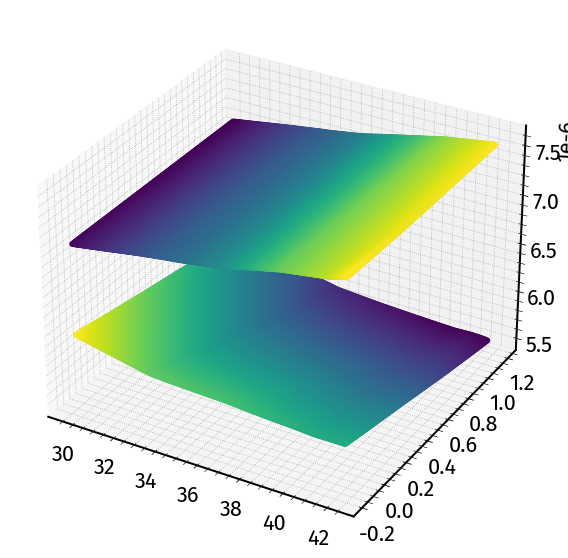

In [28]:
loss_surface(jet_idx = 42,
             idxA = 0,
             idxB = 1,
             hA = 1,
             wB = 1,
             n = 500)

tensor(2)


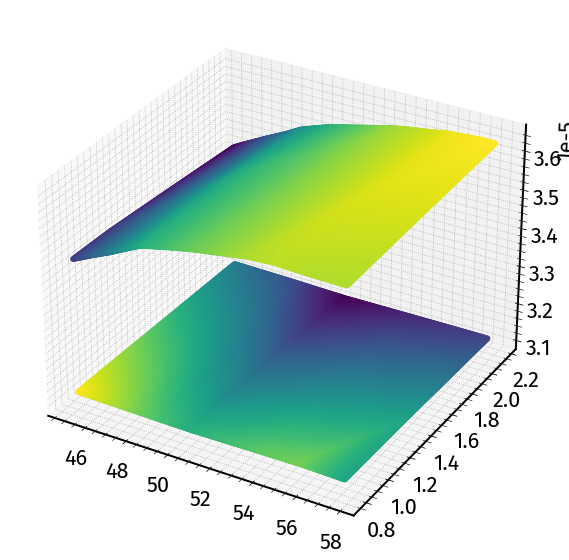

In [29]:
loss_surface(jet_idx = 26,
             idxA = 0,
             idxB = 1,
             hA = 1,
             wB = 1,
             n = 500)

tensor(0)


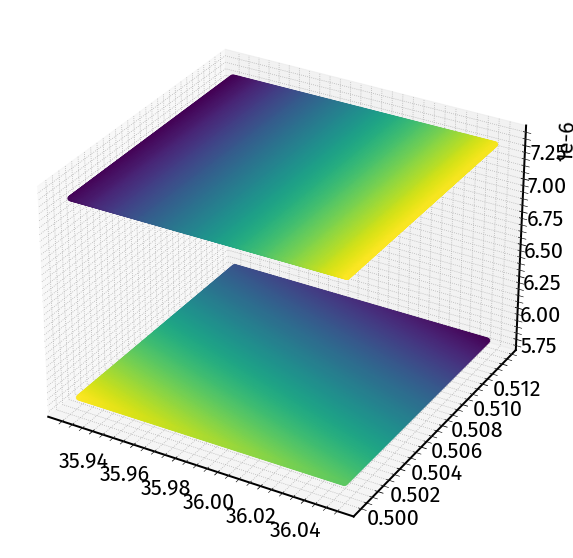

In [30]:
loss_surface(jet_idx = 42,
             idxA = 0,
             idxB = 1,
             hA = 0.01,
             wB = 0.01,
             n = 500)

tensor(0)


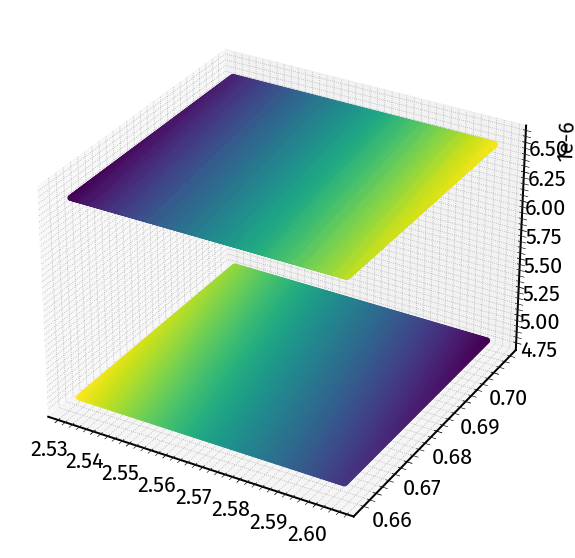

In [31]:
loss_surface(jet_idx = 42,
             idxA = 2,
             idxB = 3,
             hA = 0.01,
             wB = 0.01,
             n = 500)

tensor(0)


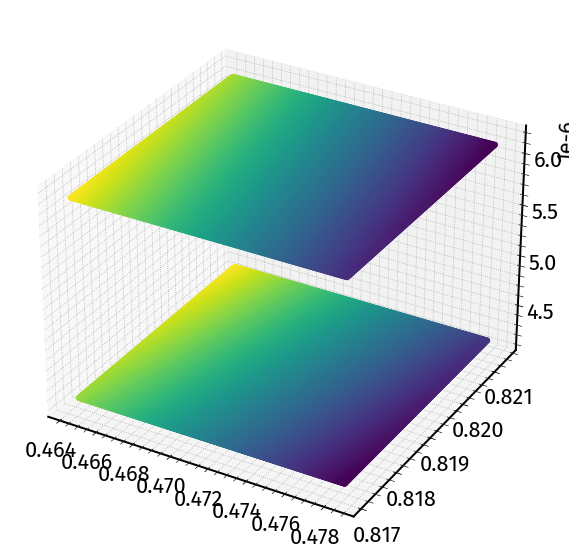

In [32]:
loss_surface(jet_idx = 42,
             idxA = 14,
             idxB = 15,
             hA = 0.01,
             wB = 0.01,
             n = 500)

In [33]:
random_index = 42

In [34]:
random_pred = predictions[random_index]
random_target = test_targets[random_index]
random_jet = test_inputs[random_index]

In [35]:
random_target

tensor(0)

In [36]:
modified_pt_eta = torch.ones(250000,2)*(random_jet[0:2]) + torch.cartesian_prod(x,y)

In [37]:
modified_pt_eta

tensor([[-0.3280, -0.1292],
        [-0.3280, -0.1272],
        [-0.3280, -0.1252],
        ...,
        [ 0.6720,  0.8668],
        [ 0.6720,  0.8688],
        [ 0.6720,  0.8708]])

In [38]:
modified_remaining = torch.ones(250000,n_input_features - 2)*(random_jet[2:])

In [39]:
modified_jet = torch.cat((modified_pt_eta, modified_remaining), 1)

In [40]:
modified_predictions = model(modified_jet)

In [41]:
modified_loss = criterion(modified_predictions, random_target*torch.ones(250000).long())

In [42]:
modified_pt_eta[:,0]

tensor([-0.3280, -0.3280, -0.3280,  ...,  0.6720,  0.6720,  0.6720])

In [43]:
pt_back = scalers[0].inverse_transform(modified_pt_eta[:,0].detach().numpy())
eta_back = scalers[1].inverse_transform(modified_pt_eta[:,1].detach().numpy())

(array([[7.09789310e-06, 7.09785718e-06, 7.09785718e-06, ...,
         7.08803873e-06, 7.08803827e-06, 7.08800235e-06],
        [7.09869119e-06, 7.09863752e-06, 7.09861888e-06, ...,
         7.08883499e-06, 7.08883454e-06, 7.08879952e-06],
        [7.09945243e-06, 7.09941742e-06, 7.09938104e-06, ...,
         7.08963171e-06, 7.08961443e-06, 7.08959624e-06],
        ...,
        [7.54872781e-06, 7.54863277e-06, 7.54857592e-06, ...,
         7.54630582e-06, 7.54634402e-06, 7.54636312e-06],
        [7.55019209e-06, 7.55011433e-06, 7.55003794e-06, ...,
         7.54715211e-06, 7.54718894e-06, 7.54722805e-06],
        [7.55165320e-06, 7.55157726e-06, 7.55149995e-06, ...,
         7.54799794e-06, 7.54803568e-06, 7.54807434e-06]]),
 array([29.69766045, 29.7228306 , 29.74800076, 29.77317091, 29.79834106,
        29.82351122, 29.84868137, 29.87385153, 29.89902168, 29.92419184,
        29.94936199, 29.97453215, 29.9997023 , 30.02487246, 30.05004261,
        30.07521276, 30.10038292, 30.12555307,

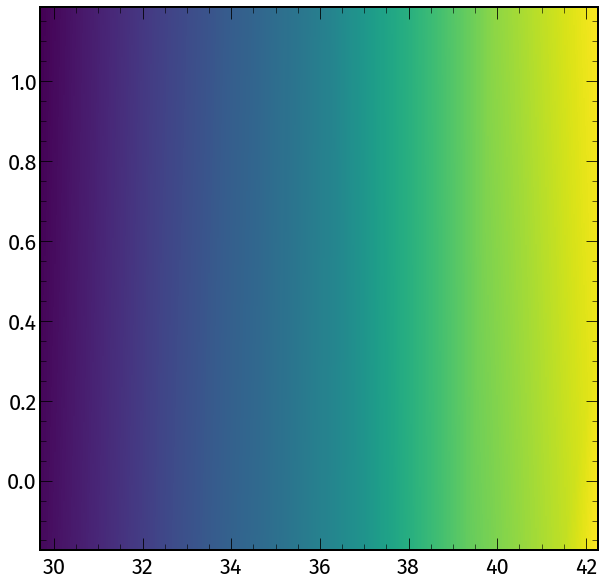

In [44]:
plt.hist2d(pt_back,eta_back,bins=500,weights=modified_loss.detach().numpy())

In [45]:
modified_predictions_ = model_(modified_jet)

In [46]:
modified_loss_ = criterion(modified_predictions_, random_target*torch.ones(250000).long())

(array([[6.18265585e-06, 6.18192598e-06, 6.18116383e-06, ...,
         5.84138616e-06, 5.84075497e-06, 5.84009467e-06],
        [6.18151307e-06, 6.18078320e-06, 6.18002196e-06, ...,
         5.84024383e-06, 5.83958308e-06, 5.83892324e-06],
        [6.18035483e-06, 6.17960995e-06, 6.17887963e-06, ...,
         5.83907286e-06, 5.83841211e-06, 5.83778183e-06],
        ...,
        [5.92545393e-06, 5.92458491e-06, 5.92368724e-06, ...,
         5.52566689e-06, 5.52494112e-06, 5.52424308e-06],
        [5.92539254e-06, 5.92450897e-06, 5.92364131e-06, ...,
         5.52495521e-06, 5.52424308e-06, 5.52353094e-06],
        [5.92531615e-06, 5.92444712e-06, 5.92356446e-06, ...,
         5.52424308e-06, 5.52353094e-06, 5.52280608e-06]]),
 array([29.69766045, 29.7228306 , 29.74800076, 29.77317091, 29.79834106,
        29.82351122, 29.84868137, 29.87385153, 29.89902168, 29.92419184,
        29.94936199, 29.97453215, 29.9997023 , 30.02487246, 30.05004261,
        30.07521276, 30.10038292, 30.12555307,

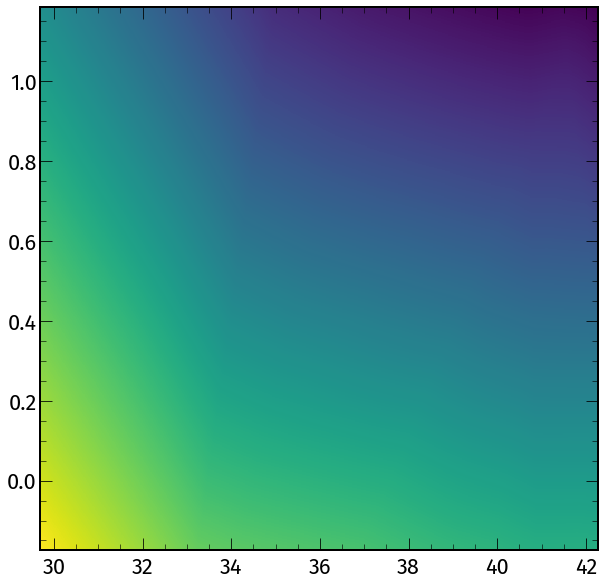

In [47]:
plt.hist2d(pt_back,eta_back,bins=500,weights=modified_loss_.detach().numpy(),norm=matplotlib.colors.LogNorm())

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


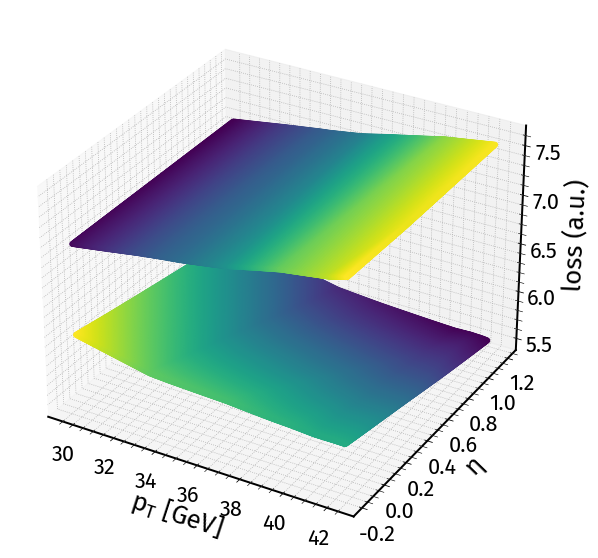

In [48]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter(pt_back,eta_back,modified_loss.detach().numpy()*1e6,c=modified_loss.detach().numpy())
ax.scatter(pt_back,eta_back,modified_loss_.detach().numpy()*1e6,c=modified_loss_.detach().numpy())
ax.set_xlabel('\n'+r'$p_T$ [GeV]')
ax.set_ylabel('\n'+r'$\eta$')
ax.set_zlabel('\nloss (a.u.)')
fig.savefig(f'example_loss.pdf', bbox_inches='tight')
fig.savefig(f'example_loss.png', bbox_inches='tight', dpi=900, facecolor='w', transparent=False)

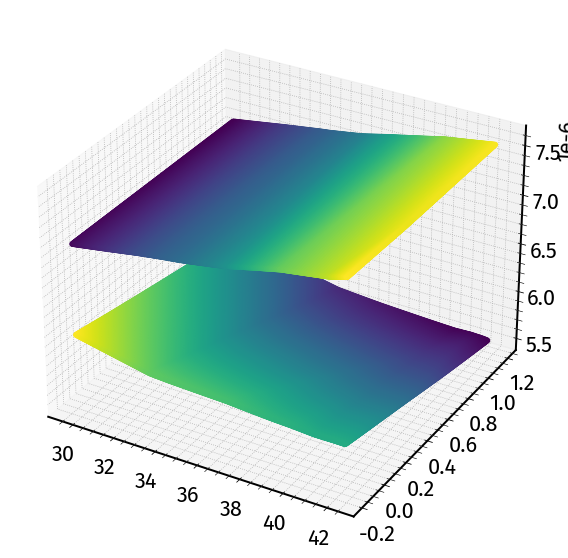

In [49]:
ax = plt.axes(projection ='3d')
ax.scatter(pt_back,eta_back,modified_loss.detach().numpy(),c=modified_loss.detach().numpy())
ax.scatter(pt_back,eta_back,modified_loss_.detach().numpy(),c=modified_loss_.detach().numpy())
fig.savefig(f'example_loss.pdf', bbox_inches='tight')
fig.savefig(f'example_loss.png', bbox_inches='tight', dpi=900, facecolor='w', transparent=False)

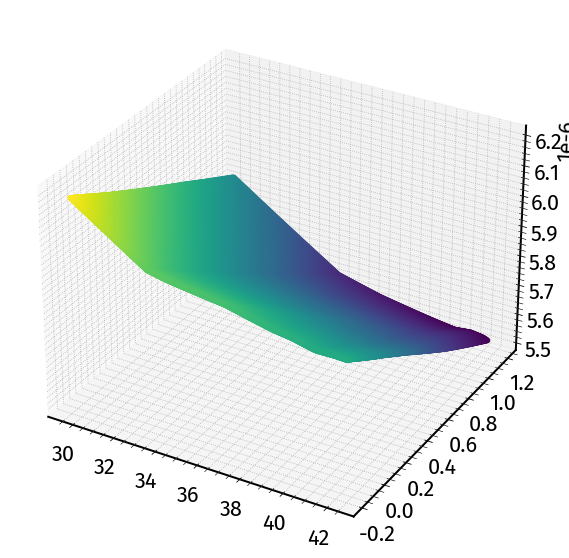

In [50]:
ax = plt.axes(projection ='3d')
#ax.scatter(pt_back,eta_back,modified_loss.detach().numpy(),c=modified_loss.detach().numpy())
ax.scatter(pt_back,eta_back,modified_loss_.detach().numpy(),c=modified_loss_.detach().numpy())